# Histogram Equalization
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [histogram_equalization.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/histogram_equalization.ipynb)
---
Histogram equalization concept and algorithm applied to digital image color processing.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import imageio

from _utils import *

## 1. Grayscale images
---
*Histogram equalization* of a grayscale images $x$ (single channel) considers the *probability density* of the gray levels $i$, defined by:

$$ \large
p_x(i)=p(x=i)=\frac{n_i}{n}, \quad 0 \leq i \leq L
$$

where:

- $n_i$ is the number of occurrences of gray level $i$
- $n$ total number of pixels
- $L$ total number of grey levels (8bits images this value is 256)

Considering that we have the ordered *probability density* $p_x(i)$, the equalization is given by the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function), defined by:

$$ \large
cdf_x(i)=\sum_{j=0}^{i}p_x(j)
$$

The motivation comes from the continuous space concept of *CDF*, which could be understanded by:

$$
CDF_X(x)=\int_{-\infty}^{x}p_x(t)dt
$$

In [2]:
# Read grayscale image
img_float = imageio.imread('../_data/ship.png')

In [3]:
summary(img_float)


       min:          0.0000
  1st Quar:        113.0000
    median:        143.0000
      mean:        129.7080
  3rd Quar:        157.0000
       max:        255.0000
     sigma:         46.6772


In [4]:
# Change range from [0-255] to [0.0-1.0]
img_float = img_float/(2**8 - 1)
summary(img_float)


       min:          0.0000
  1st Quar:          0.4431
    median:          0.5608
      mean:          0.5087
  3rd Quar:          0.6157
       max:          1.0000
     sigma:          0.1830


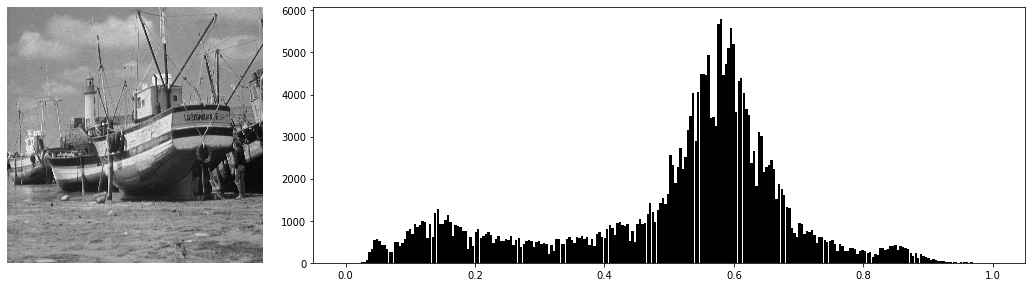

In [5]:
# Visualize the input image histogram
histogram(img_float, bins=2**8, interval=[0, 1])

One easier and more performatic way to do the process of histogram equalization is by ordering the gray values and finding its sorted indices, instead of finding the probability distribution and do the cummulative sum of those values. At the end of this process, it is necessary to normalize the output value by the total number of pixels. The result is exactly the same.

In [6]:
def eqHist1(matrix_in):
    # Read input grayscale image
    matrix_in = matrix_in.copy()
    N1, N2 = matrix_in.shape
    # Flat image to be sorted
    flat = matrix_in.ravel()
    # Sort the pixels
    sort = np.sort(flat)
    # Find the sorted index for each gray value
    search = sort.searchsorted(matrix_in)
    # Normalize the output
    norm = search/(N1*N2 - 1)
    return norm

img_float_eq = eqHist1(img_float)

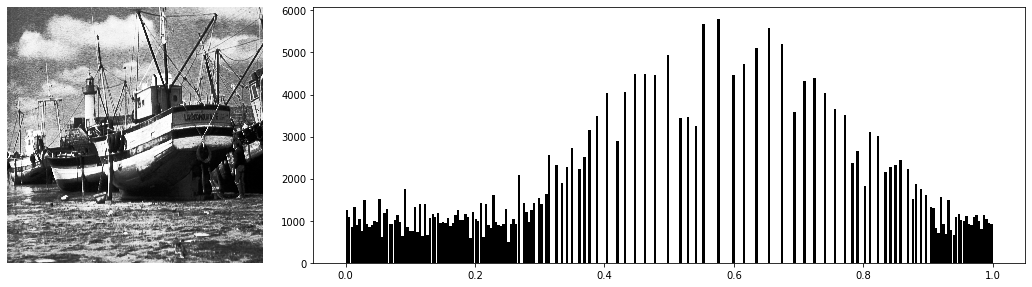

In [7]:
# Visualized the histogram of the equalized image
histogram(img_float_eq, bins=2**8, interval=[0, 1])

## 2. Color images
---
Applies the same concept of grayscale images on multi-channel images.

In [8]:
img_rgb = imageio.imread('../_data/aerial03.png')/(2**8 - 1)

In [9]:
summary(img_rgb)

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:          0.4784          0.4510          0.4314
    median:          0.5961          0.6235          0.5765
      mean:          0.5893          0.5948          0.5625
  3rd Quar:          0.7176          0.7373          0.6941
       max:          1.0000          0.9529          0.9608
     sigma:          0.1530          0.1813          0.1715


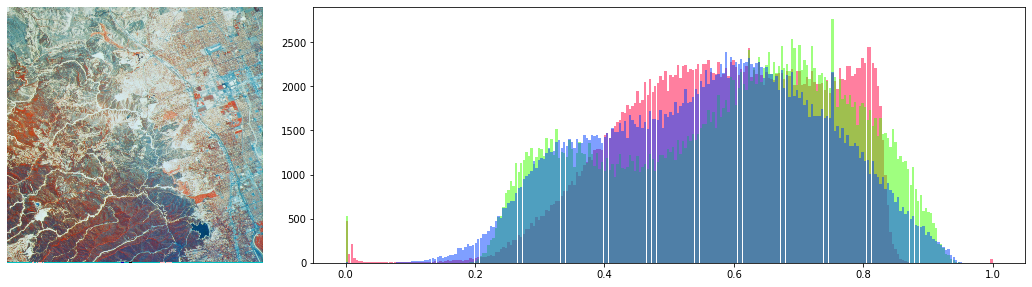

In [10]:
histogram(img_rgb, bins=2**8, interval=[0, 1])

### 2.1. RGB Histogram equalization
---
Applies histogram equalization, stretching each channel separately. This process does not preserve the hue distribution what it means that the colors might be changed.

In [11]:
def eqHist3(img_in):
    img_in = img_in.copy()
    # Split channels
    R = img_in[:,:,0]
    G = img_in[:,:,1]
    B = img_in[:,:,2]
    N1, N2, _ = img_in.shape
    # Sort channels
    Rs = np.sort(R.ravel())
    Gs = np.sort(G.ravel())
    Bs = np.sort(B.ravel())
    # Find sorted indices
    R[:,:] = Rs.searchsorted(R)
    G[:,:] = Gs.searchsorted(G)
    B[:,:] = Bs.searchsorted(B)
    # Return normalized result
    return img_in/(N1*N2 - 1)

img_rgb_eq = eqHist3(img_rgb)

In [12]:
summary(img_rgb_eq)

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:          0.2479          0.2468          0.2486
    median:          0.4950          0.4963          0.4984
      mean:          0.4963          0.4969          0.4969
  3rd Quar:          0.7495          0.7435          0.7485
       max:          0.9999          1.0000          1.0000
     sigma:          0.2882          0.2883          0.2885


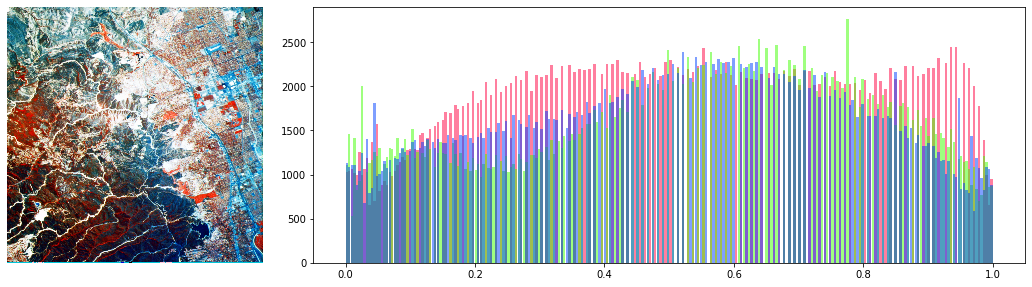

Wall time: 1.24 s


In [13]:
%%time
histogram(img_rgb_eq, bins=2**8, interval=[0, 1])

### 2.2. HSV Histogram equalization
---
Applies histogram equalization preserving the hue distribution. This process can affect the saturation value or not.

In [14]:
def eqHist3hsv(img_in, saturation=False):
    img_rgb = img_in.copy()
    # Convert from RGB to HSV
    img_hsv = mpl.colors.rgb_to_hsv(img_rgb)
    N1, N2, _ = img_hsv.shape
    if saturation:
        # If saturation is true
        # stretches the saturation component
        S = img_hsv[:,:,1]
        Ss = np.sort(S.ravel())
        S[:,:] = Ss.searchsorted(S)/(N1*N2 - 1)
    # Stretches the value component
    V = img_hsv[:,:,2]
    Vs = np.sort(V.ravel())
    V[:,:] = Vs.searchsorted(V)/(N1*N2 - 1)
    return mpl.colors.hsv_to_rgb(img_hsv)

img_hsv_eq = eqHist3hsv(img_rgb)

In [15]:
summary(img_hsv_eq)

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:          0.2166          0.2020          0.1797
    median:          0.4374          0.4604          0.4194
      mean:          0.4540          0.4691          0.4386
  3rd Quar:          0.6933          0.7225          0.6710
       max:          0.9999          0.9998          0.9998
     sigma:          0.2753          0.2953          0.2821


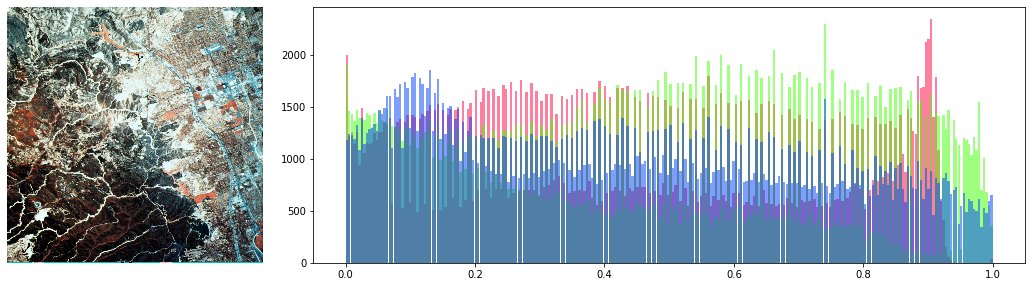

Wall time: 1.19 s


In [16]:
%%time
histogram(img_hsv_eq, bins=2**8, interval=[0, 1])

### Same process but stretching the saturation values.

In [17]:
img_hsv_eq2 = eqHist3hsv(img_rgb, saturation=True)

In [18]:
summary(img_hsv_eq2)

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:          0.1443          0.1490          0.0886
    median:          0.3490          0.4237          0.3065
      mean:          0.3951          0.4392          0.3613
  3rd Quar:          0.6432          0.7030          0.5828
       max:          0.9999          0.9998          0.9998
     sigma:          0.2796          0.3078          0.2928


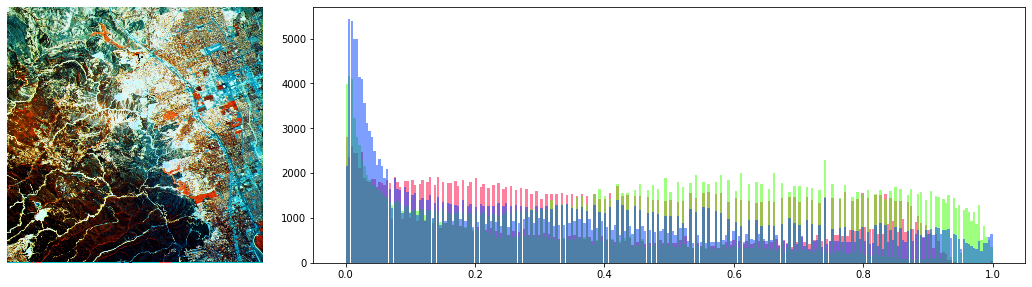

Wall time: 1.19 s


In [19]:
%%time
histogram(img_hsv_eq2, bins=2**8, interval=[0, 1])